In [2]:
import xgboost as xgb
from sklearn.datasets import load_iris
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [19]:
iris = load_iris()
x = iris.data
y = iris.target
x_train, x_test, y_train,y_test = train_test_split(
    x, y, test_size=0.2, random_state=1234565)

In [30]:
# set xgboost parameters
params = {
    'booster':'gbtree',
    'objective':'multi:softmax',
    'num_class':3,
    'gamma':0.1,
    'max_depth':6,
    'lambda':2,
    'subsample':0.7,
    'colsample_bytree':0.7,
    'min_child_weight':3,
    'silent':1,
    'eat':0.1,
    'seed':1000,
    'nthread':4,
}
plst = params.items()
dtrain = xgb.DMatrix(x_train, y_train)
num_rounds = 500
model = xgb.train(plst, dtrain, num_rounds)

In [41]:
# 测试
dtest = xgb.DMatrix(x_test)
ans = model.predict(dtest)

In [47]:
# 计算准确率
cnt1 = 0
cnt2 = 0
for i in range(len(y_test)):
    if ans[i] == y_test[i]:
        cnt1 += 1
    else:
        cnt2 += 1
print('Accuracy: %.4f %%' % (100 * cnt1/(cnt1 + cnt2)))

Accuracy: 96.6667 %


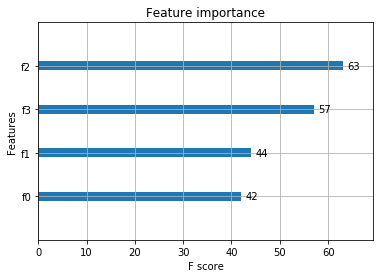

In [48]:
# 显示重要特征
plot_importance(model)
plt.show()